<a href="https://colab.research.google.com/github/gar1ma/DA-Experiments/blob/main/DA_Exp01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:

Perform EDA such as number of data samples, number of features, number of classes, number of data samples per class, removing missing values, conversion to numbers, using seaborn library to plot different graphs.

Dataset taken of World Hapiness Report 2021

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #using seaborn library for visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)


In [ ]:
df = pd.read_csv("dataforlab.csv") #reading the data
df.head(5) # To display the top 5 rows 

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
df.tail(3) #to display the bottom three rows

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [ ]:
len(df.columns) #to get the number of features (which is basicallu no of columnsof the dataset)

20

In [ ]:
len(df) #this gives us the number of samples

149

In [ ]:
df.shape #to get the structure/dimension of the data

(149, 20)

In [ ]:
df.dtypes #checking the data types

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [ ]:
#number of classes, number of data samples per class

In [ ]:
print(df.isnull().sum()) #to check if there are any missing or null values

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


In [ ]:
#renaming column
df = df.rename(columns={"Country name": "Country","Ladder score": "Ladder_score"})
df.head(5)

,Country,Regional indicator,Ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
#dropping extra/irrelevant columns
df = df.drop(['Regional indicator', 'Standard error of ladder score','Logged GDP per capita','Social support','Generosity','Perceptions of corruption','Freedom to make life choices','Healthy life expectancy','upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia'], axis=1)
df.head(5)

,Country,Ladder_score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
#to check if we have any duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [ ]:
df.count() #no of rows/data samples present

Country                                       149
Ladder_score                                  149
Explained by: Log GDP per capita              149
Explained by: Social support                  149
Explained by: Healthy life expectancy         149
Explained by: Freedom to make life choices    149
Explained by: Generosity                      149
Explained by: Perceptions of corruption       149
Dystopia + residual                           149
dtype: int64

Since there are no missing values present in the data set hence we won't need to perform commands to remove those (df = df.dropna()  is used)

We now take sum of all factors to do comparison for visualisation

In [ ]:
def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)
sum_frame_by_column(df, 'total', ['Explained by: Log GDP per capita','Explained by: Social support','Dystopia + residual','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption'])
df.head(5)

,Country,Ladder_score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,total
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253,7.842
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868,7.620
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839,7.570
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967,7.554
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798,7.464


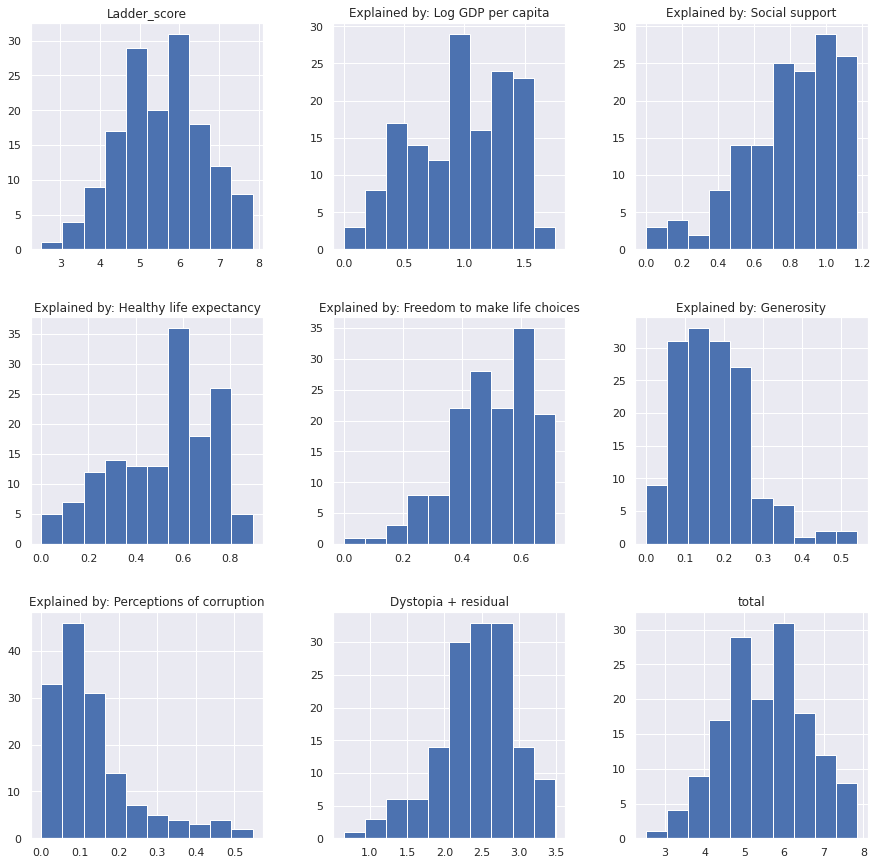

In [ ]:
df.hist(figsize=(15,15))
plt.show()
#A histogram groups numbers into ranges (or bins) and the height of a bar shows how many numbers fall in that range. 
#df.hist() plots a histogram of the data’s numeric features in a grid.

Now before having different types of plots we will identfy and remove the outliers: An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that we are going to perform is called IQR score technique.

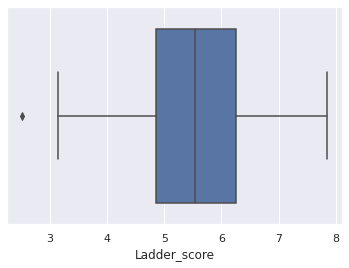

In [ ]:
sns.boxplot(x=df['Ladder_score'])

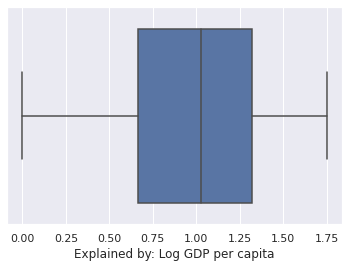

In [ ]:
sns.boxplot(x=df['Explained by: Log GDP per capita'])


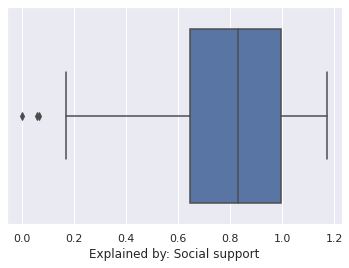

In [ ]:
sns.boxplot(x=df['Explained by: Social support'])

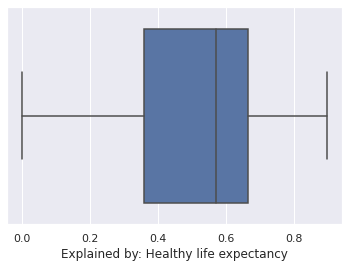

In [ ]:
sns.boxplot(x=df['Explained by: Healthy life expectancy'])

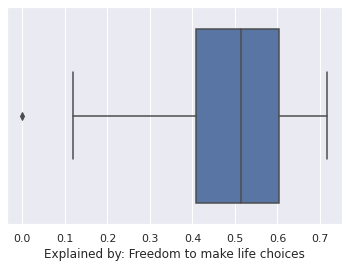

In [ ]:
sns.boxplot(x=df['Explained by: Freedom to make life choices'])

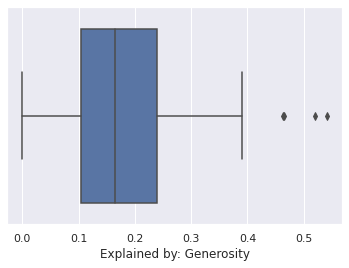

In [ ]:
sns.boxplot(x=df['Explained by: Generosity'])

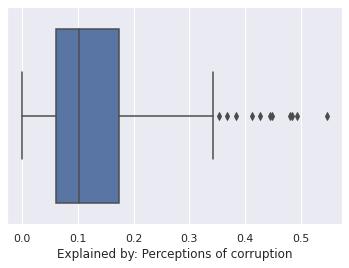

In [ ]:
sns.boxplot(x=df['Explained by: Perceptions of corruption'])

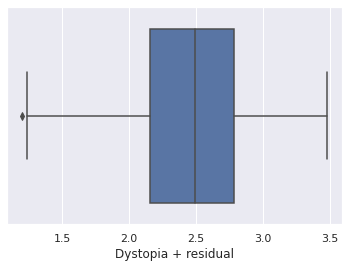

In [ ]:
sns.boxplot(x=df['Dystopia + residual'])

In [ ]:
#finding inter quartile range (IQR) to remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Ladder_score                                  1.403
Explained by: Log GDP per capita              0.657
Explained by: Social support                  0.349
Explained by: Healthy life expectancy         0.308
Explained by: Freedom to make life choices    0.194
Explained by: Generosity                      0.134
Explained by: Perceptions of corruption       0.114
Dystopia + residual                           0.656
total                                         1.403
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(129, 10)

We see that around 20 rows were outliers which are now removed

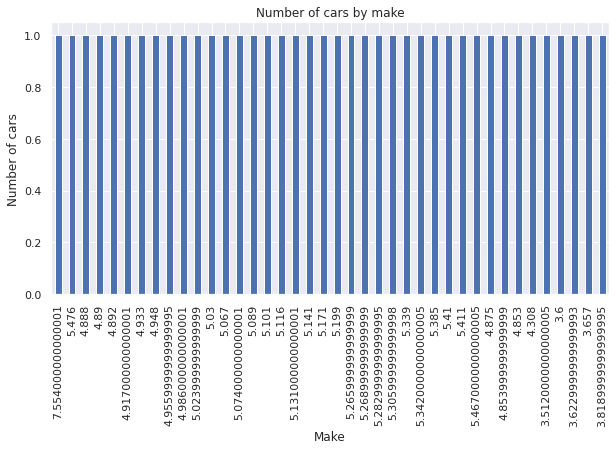

In [ ]:
#Ploting a feature
#we can call the value_counts method on the ladder field to see the count of unique values for each value
#df['total'].value_counts().plot(kind='bar', figsize=(20,10));
#plt.ylabel('Number of countries')
#plt.xlabel('Value of ');
df.total.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');


In [ ]:
#Ploting different features against one another (scatter), against frequency (histogram)
df.Ladder_score.value_counts().nlargest(100).plot(kind='bar', figsize=(100,50))
plt.title("Frequency of Ladder score")
plt.ylabel('Number of countries')
plt.xlabel('Ladder score');